# Bifurcation diagram of Logistic diagram

Bifurcation diagrams allow us to visualise the impact of parameters on the solutions.

You can read more about them [here](https://math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Introduction_to_the_Modeling_and_Analysis_of_Complex_Systems_(Sayama)/08%3A_Bifurcations/8.02%3A_Bifurcations_in_1-D_Continuous-Time_Models).

This notebook uses [BifrucationKit.jl](https://bifurcationkit.github.io/BifurcationKitDocs.jl/dev/).

In [1]:
using BifurcationKit
using Plots, Revise

const BK = BifurcationKit

BifurcationKit

Definition of Logistic Equation

In [2]:
function N_dot!(dN, N, p, t=0)
    (;r, a, b) = p
    dN = N .* (r .- a .* (N .- b).^2)
    dN
end

N_dot! (generic function with 2 methods)

parameters are stored as $p=(r, a, b)$

In [3]:
par = (r=1., a=1., b=1.)

(r = 1.0, a = 1.0, b = 1.0)

# Bifurcation Diagram in $r$

In [4]:
prob = BifurcationProblem(
    N_dot!, 
    [0.], 
    par,
    (@optic _.r),   # Here we set the continuation parameter
    record_from_solution = (x, p; k...) -> x[1]
)

┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: r

In [5]:
continuation_bounds = ContinuationPar(
    p_min = -0.5, 
    p_max = 4., 
    n_inversion=4)

bd = bifurcationdiagram(prob, 
    PALC(), 
    2, 
    continuation_bounds; 
    bothside = true)

┌ Warning: The zero eigenvalue is not that small λ = 0.00022097086912076236, this can alter the computation of the normal form. You can either refine the point using Newton or use a more precise bisection by increasing `n_inversion`
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/NormalForms.jl:82
┌ Warning: The zero eigenvalue is not that small λ = 0.00022097086912076236, this can alter the computation of the normal form. You can either refine the point using Newton or use a more precise bisection by increasing `n_inversion`
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/NormalForms.jl:82


[Bifurcation diagram]
 ┌─ From 0-th bifurcation point.
 ├─ Children number: 2
 └─ Root (recursion level 1)
      ┌─ Curve type: EquilibriumCont
      ├─ Number of points: 43
      ├─ Type of vectors: Vector{Float64}
      ├─ Parameter r starts at -0.5, ends at 4.0
      ├─ Algo: PALC
      └─ Special points:

- #  1, endpoint at r ≈ -0.50000000,                                                                     step =   0
- #  2,       bp at r ≈ +1.00022097 ∈ (+0.99955806, +1.00022097), |δp|=7e-04, [converged], δ = ( 1,  0), step =  17
- #  3, endpoint at r ≈ +4.00000000,                                                                     step =  42


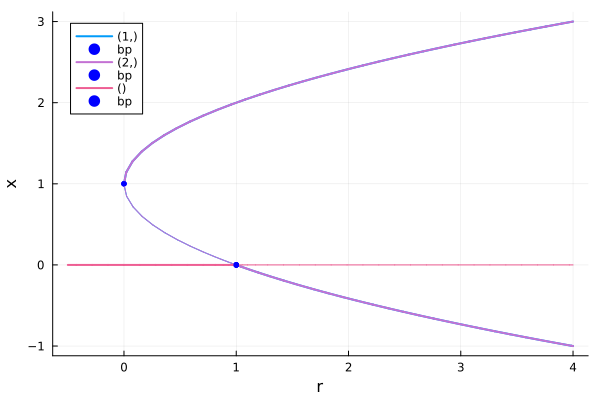

In [6]:
plot(bd)

# Bufurcation Diagram in $a$

In [7]:
prob1 = BifurcationProblem(
    N_dot!, 
    [4.], 
    par,
    (@optic _.a),   # Here we set the continuation parameter
    record_from_solution = (x, p; k...) -> x[1]
)

prob2 = BifurcationProblem(
    N_dot!, 
    [1.], 
    par,
    (@optic _.a),   # Here we set the continuation parameter
    record_from_solution = (x, p; k...) -> x[1]
)

┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: a

In [8]:
continuation_bounds = ContinuationPar(
    p_min = 0.5, 
    p_max = 4., 
    n_inversion=4)

bd1 = bifurcationdiagram(prob1, 
    PALC(), 
    2, 
    continuation_bounds; 
    bothside = true)

bd2 = bifurcationdiagram(prob2, 
    PALC(), 
    2, 
    continuation_bounds; 
    bothside = true)

┌ Warning: The zero eigenvalue is not that small λ = 0.00022097086912065134, this can alter the computation of the normal form. You can either refine the point using Newton or use a more precise bisection by increasing `n_inversion`
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/NormalForms.jl:82
┌ Warning: The zero eigenvalue is not that small λ = 0.00022097086912065134, this can alter the computation of the normal form. You can either refine the point using Newton or use a more precise bisection by increasing `n_inversion`
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/NormalForms.jl:82


[Bifurcation diagram]
 ┌─ From 0-th bifurcation point.
 ├─ Children number: 2
 └─ Root (recursion level 1)
      ┌─ Curve type: EquilibriumCont
      ├─ Number of points: 36
      ├─ Type of vectors: Vector{Float64}
      ├─ Parameter a starts at 0.5, ends at 4.0
      ├─ Algo: PALC
      └─ Special points:

- #  1, endpoint at a ≈ +0.50000000,                                                                     step =   0
- #  2,       bp at a ≈ +0.99977903 ∈ (+0.99977903, +1.00044194), |δp|=7e-04, [converged], δ = (-1,  0), step =   7
- #  3, endpoint at a ≈ +4.00000000,                                                                     step =  35


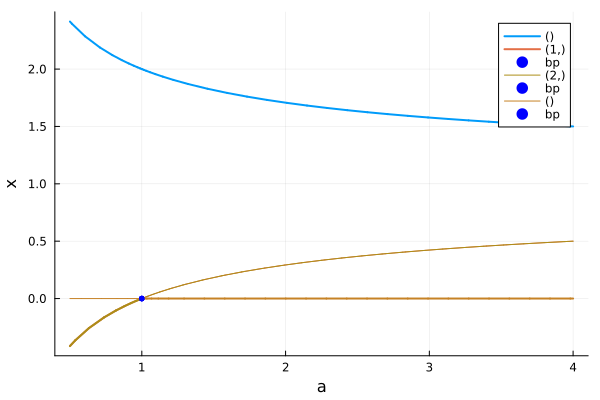

In [9]:
plot(bd1)
plot!(bd2)

# Bifurcation Diagram in $b$

In [10]:
prob1 = BifurcationProblem(
    N_dot!, 
    [4.], 
    par,
    (@optic _.b),   # Here we set the continuation parameter
    record_from_solution = (x, p; k...) -> x[1]
)

prob2 = BifurcationProblem(
    N_dot!, 
    [1.], 
    par,
    (@optic _.b),   # Here we set the continuation parameter
    record_from_solution = (x, p; k...) -> x[1]
)

┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: b

In [11]:
continuation_bounds = ContinuationPar(
    p_min = -2., 
    p_max = 2., 
    n_inversion=4)

bd1 = bifurcationdiagram(prob1, 
    PALC(), 
    2, 
    continuation_bounds; 
    bothside = true)

bd2 = bifurcationdiagram(prob2, 
    PALC(), 
    2, 
    continuation_bounds; 
    bothside = true)

┌ Warning: The zero eigenvalue is not that small λ = 0.0015624999999831043, this can alter the computation of the normal form. You can either refine the point using Newton or use a more precise bisection by increasing `n_inversion`
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/NormalForms.jl:82
┌ Warning: The zero eigenvalue is not that small λ = -0.002668100574025667, this can alter the computation of the normal form. You can either refine the point using Newton or use a more precise bisection by increasing `n_inversion`
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/NormalForms.jl:82
┌ Warning: The zero eigenvalue is not that small λ = -0.002668100574025667, this can alter the computation of the normal form. You can either refine the point using Newton or use a more precise bisection by increasing `n_inversion`
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/NormalForms.jl:82
┌ Warning: The zero eigenvalue is not that small λ = 0.000441892

[Bifurcation diagram]
 ┌─ From 0-th bifurcation point.
 ├─ Children number: 4
 └─ Root (recursion level 1)
      ┌─ Curve type: EquilibriumCont
      ├─ Number of points: 40
      ├─ Type of vectors: Vector{Float64}
      ├─ Parameter b starts at -2.0, ends at 2.0
      ├─ Algo: PALC
      └─ Special points:

- #  1, endpoint at b ≈ -2.00000000,                                                                     step =   0
- #  2,       bp at b ≈ -1.00133316 ∈ (-1.00133316, -0.99912345), |δp|=2e-03, [converged], δ = ( 1,  0), step =   8
- #  3,       bp at b ≈ +0.99977903 ∈ (+0.99977903, +1.00044194), |δp|=7e-04, [converged], δ = (-1,  0), step =  26
- #  4, endpoint at b ≈ +2.00000000,                                                                     step =  39


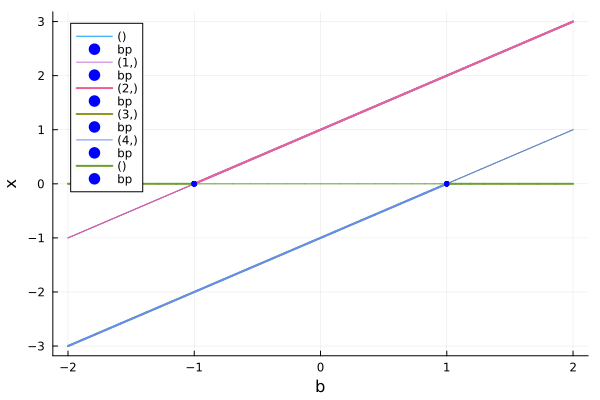

In [12]:
plot(bd1)
plot!(bd2)